<a href="https://colab.research.google.com/github/malh718/datasci_4_web_viz/blob/main/4_507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:

df = pd.read_csv('dc.csv')
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [12]:
df2=pd.read_csv('dele.csv')
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [13]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'BINGE') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
32,2021,DC,District of Columbia,District of Columbia,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,20.7,...,17.9,23.9,670050,11001,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-77.0165167 38.9042474),1049


In [14]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df2 = df2[(df2['MeasureId'] == 'BINGE') & (df2['Data_Value_Type'] == 'Age-adjusted prevalence')]
df2

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
76,2021,DE,Delaware,New Castle,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,15.6,...,13.1,18.3,571708,10003,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.6441324 39.5759152),1047
101,2021,DE,Delaware,Sussex,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.7,...,14.2,19.6,247527,10005,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.3370237 38.6732275),1048
170,2021,DE,Delaware,Kent,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,13.3,...,11.1,15.8,184149,10001,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.5029819 39.0970884),1046


In [19]:
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
District of Columbia    20.7
Name: Data_Value, dtype: float64

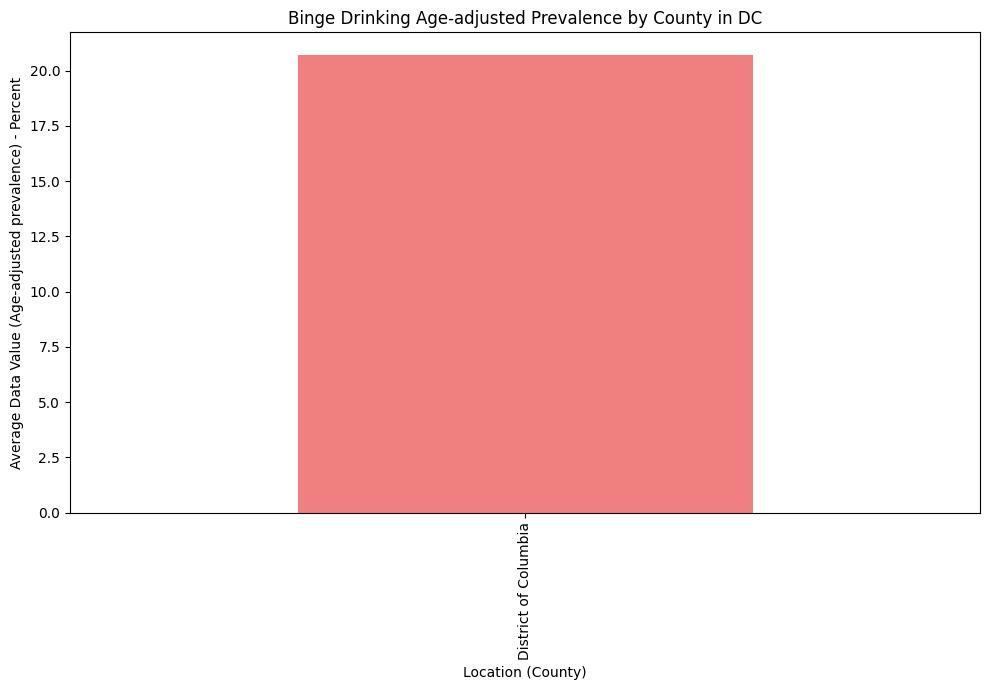

In [20]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in DC')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge_drinking_per_location.png")  # Saving the plot as an image
plt.show()

In [21]:
grouped2 = df2.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped2

LocationName
Sussex        16.7
New Castle    15.6
Kent          13.3
Name: Data_Value, dtype: float64

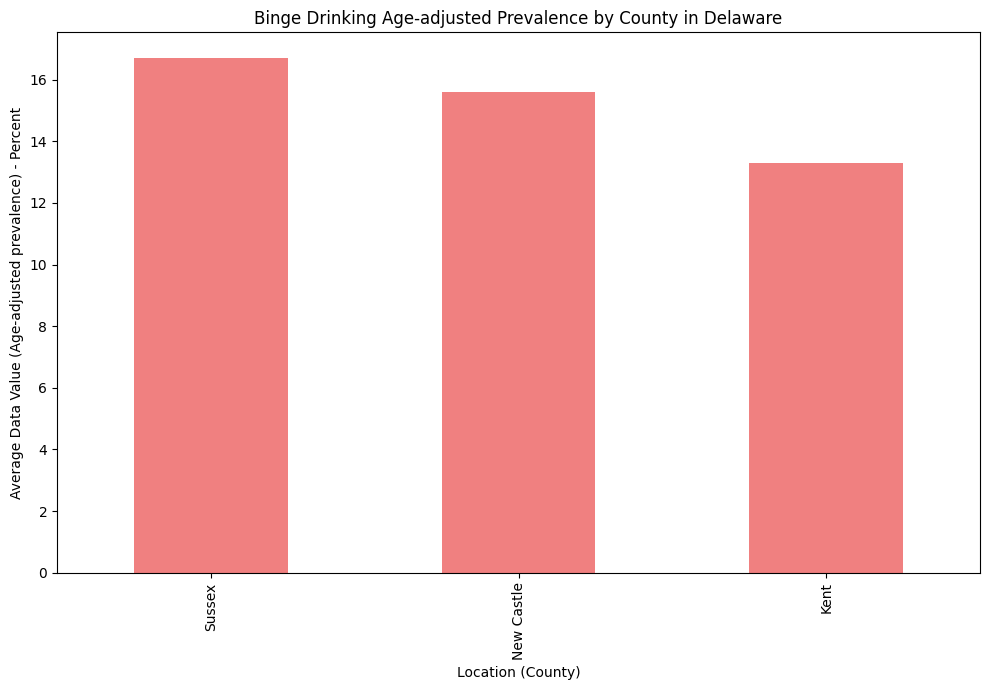

In [22]:
# Plotting
plt.figure(figsize=(10, 7))
grouped2.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in Delaware')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge_drinking_per_location.png")  # Saving the plot as an image
plt.show()

In [27]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df2['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df2['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df2[df2['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Binge Drinking Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Kent', 'New Castle', 'Sussex'), value='Kent'), …